<a href="https://colab.research.google.com/github/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/blob/main/multi_factor_regression_model_of_a_bank_s_net_profit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/main/one_bank.xlsx"
df = pd.read_excel(url, sheet_name='Лист1')

print("Файл успешно загружен!")
print(f"Размер данных: {df.shape}")
print(df.head())

Файл успешно загружен!
Размер данных: (9, 11)
   period_number          y  x_1   x_2  x_3          x_4         x_5  \
0              1  209482510   21  1.32  314  29875948580  1663276669   
1              2   -3822648   21  1.23  311  30647438247   200212856   
2              3   -4556210   21  0.81  311  31556934105   379751591   
3              4    2370197   21  0.65  311  21318900812   574785461   
4              5    7437978   21  0.40  309  22364046651   761127870   

          x_6         x_7          x_8        x_9  
0  2080305711  1420367739  12006595748  235098778  
1   223490903  1387635651  11818688250  237527067  
2   424836347  1381702558  11450219072  237431687  
3   647144157  1396181237  11266386302  239809930  
4   861768051  1405545032  11421110732  242251159  


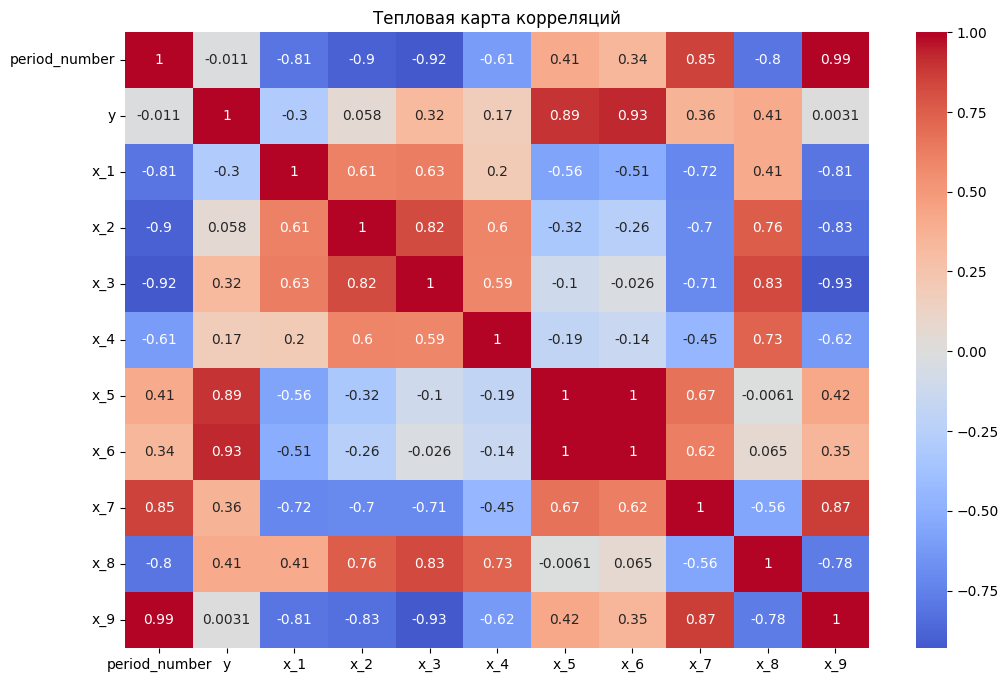

In [4]:
# Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций')
plt.show()

In [5]:
# Разделение на признаки и целевую переменную
X = df[['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9']]
y = df['y']

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Прогноз и оценка
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f'R² = {r2:.4f}')
print('\nКоэффициенты модели:')
for i, col in enumerate(X.columns):
    print(f'{col}: {model.coef_[i]:.4f}')
print(f'Intercept: {model.intercept_:.4f}')

R² = 1.0000

Коэффициенты модели:
x_1: -25463408.5348
x_2: -19898024.0216
x_3: -15778951.0847
x_4: -0.0025
x_5: -1.7983
x_6: 1.5374
x_7: 0.5000
x_8: -0.0230
x_9: -10.1863
Intercept: 7552600604.6103


In [9]:
mse_sklearn = mean_squared_error(y, y_pred)
r2_sklearn = r2_score(y, y_pred)
print(mse_sklearn)
print(r2_sklearn)

29.78511326223078
0.9999999999999931


   period_number          y        y_pred
0              1  209482510  2.094825e+08
1              2   -3822648 -3.822645e+06
2              3   -4556210 -4.556218e+06
3              4    2370197  2.370192e+06
4              5    7437978  7.437981e+06
5              6   41148354  4.114836e+07
6              7   59248761  5.924876e+07
7              8   72464052  7.246405e+07
8              9  106641173  1.066412e+08

R² (коэффициент детерминации): 1.0000
MSE (среднеквадратичная ошибка): 29.79


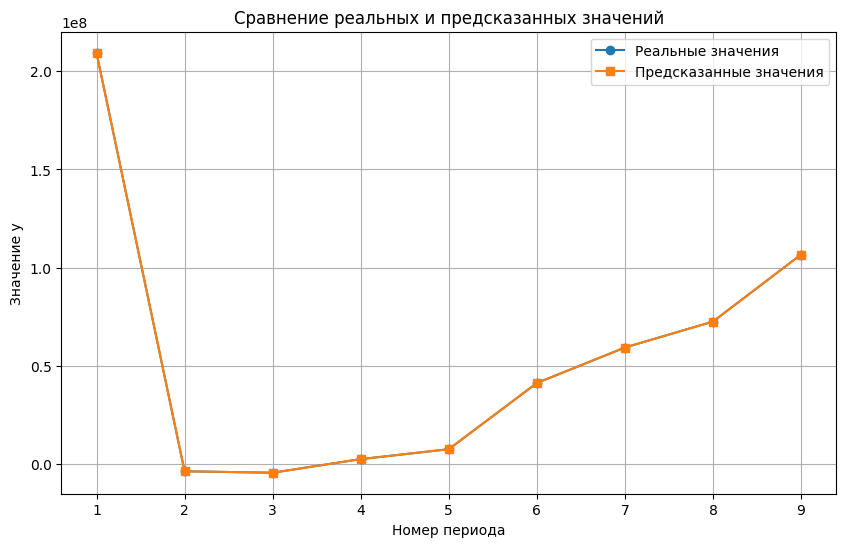

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Загрузка данных
url = "https://raw.githubusercontent.com/antipovaya/multi-factor_regression_model_of_a_bank-s_net_profit/main/one_bank.xlsx"
df = pd.read_excel(url, sheet_name='Лист1')

# Выделяем признаки и целевую переменную
X = df.drop(['period_number', 'y'], axis=1)  # Убираем номер периода и целевую переменную
y = df['y']

# Создаем и обучаем модель
model = LinearRegression()
model.fit(X, y)

# Предсказание
y_pred = model.predict(X)

# Добавим предсказания в исходный DataFrame для сравнения
df['y_pred'] = y_pred

# Выведем таблицу с реальными и предсказанными значениями
print(df[['period_number', 'y', 'y_pred']])

# Вычислим метрики
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nR² (коэффициент детерминации): {r2:.4f}")
print(f"MSE (среднеквадратичная ошибка): {mse:.2f}")

# Построим график сравнения
plt.figure(figsize=(10, 6))
plt.plot(df['period_number'], df['y'], label='Реальные значения', marker='o')
plt.plot(df['period_number'], df['y_pred'], label='Предсказанные значения', marker='s')
plt.xlabel('Номер периода')
plt.ylabel('Значение y')
plt.title('Сравнение реальных и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Анализ корреляций с целевой переменной
correlations_with_y = df.corr()['y'].sort_values(ascending=False)
print("Корреляции с y:")
print(correlations_with_y)

# Выбираем только предикторы с достаточной корреляцией (например, |r| > 0.3)
significant_predictors = correlations_with_y[abs(correlations_with_y) > 0.3].index
significant_predictors = [p for p in significant_predictors if p != 'y']
print(f"\nЗначимые предикторы: {significant_predictors}")

Корреляции с y:
y                1.000000
y_pred           1.000000
x_6              0.925059
x_5              0.894453
x_8              0.411008
x_7              0.364676
x_3              0.318514
x_4              0.171434
x_2              0.057921
x_9              0.003056
period_number   -0.010525
x_1             -0.295562
Name: y, dtype: float64

Значимые предикторы: ['y_pred', 'x_6', 'x_5', 'x_8', 'x_7', 'x_3']
